In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("data/Telco_customer_churn_adapted_v2.xlsx")
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df.drop(["Customer ID", "Churn Label"])

- Demographic 
- Geographic 
- Psychographic 
- Technographic 
- Behavioral 
- Needs-based 
- Value-based 

# Value-based Segmentation

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
X = df[["Tenure Months", "Monthly Purchase (Thou. IDR)", "CLTV (Predicted Thou. IDR)"]]

# Preprocessing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

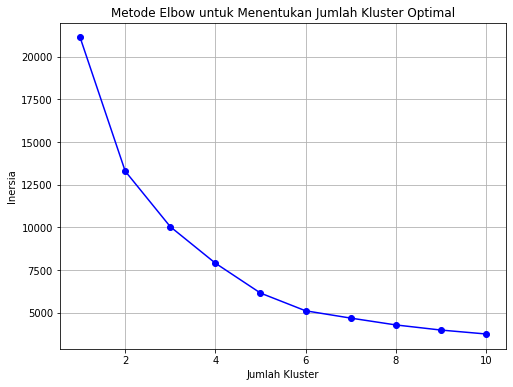

In [13]:
# Impor pustaka yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Pilih atribut yang akan digunakan untuk klasterisasi (misalnya, Monthly Purchase dan CLTV)
X = df[["Tenure Months", "Monthly Purchase (Thou. IDR)", "CLTV (Predicted Thou. IDR)"]]

# Preprocessing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hitung inersia (within-cluster sum of squares) untuk berbagai jumlah kluster
inertia = []
k_values = range(1, 11)  # Coba dari 1 hingga 10 kluster
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow method untuk menentukan jumlah kluster yang optimal
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.grid()
plt.show()

In [33]:
# Impor pustaka yang diperlukan
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Pilih atribut yang akan digunakan untuk klasterisasi (misalnya, Monthly Purchase dan CLTV)
X = df[["Tenure Months", "Monthly Purchase (Thou. IDR)", "CLTV (Predicted Thou. IDR)"]]

# Preprocessing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preprocessing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inisialisasi model K-Means dengan jumlah kluster yang berbeda (misalnya, 2 hingga 5)
k_values = range(2, 11)
best_score = -1
best_k = 0

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X_scaled)
    
    # Prediksi kluster untuk setiap data poin
    labels = kmeans.labels_
    
    # Hitung Silhouette Score untuk evaluasi
    score = silhouette_score(X_scaled, labels)
    
    # Cek jika nilai Silhouette Score lebih baik daripada sebelumnya
    if score > best_score:
        best_score = score
        best_k = k

# Setel model K-Means dengan jumlah kluster terbaik
best_kmeans = KMeans(n_clusters=best_k, random_state=0, n_init="auto")
best_kmeans.fit(X_scaled)

# Tambahkan label kluster ke dataset
df['Cluster'] = best_kmeans.labels_

# Output hasil
print("Jumlah Kluster Terbaik:", best_k)
print("Silhouette Score Terbaik:", best_score)

Jumlah Kluster Terbaik: 5
Silhouette Score Terbaik: 0.35569619793150703


# Needs-based Segmentation

In [22]:
products = ["Games Product", "Music Product", "Education Product", "Video Product", "Call Center", "Use MyApp", "Device Class"]

In [25]:
# Mengonversi atribut biner ke angka
binary_attributes = ["Games Product", "Music Product", "Education Product", "Video Product", "Call Center", "Use MyApp"]
for col in binary_attributes:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Encoding atribut kategori (Device Class)
df_encoded = pd.get_dummies(df, columns=['Device Class'], prefix=['Device_Class'])

# Gabungkan atribut yang sudah diproses
features = ["Games Product", "Music Product", "Education Product", "Video Product", "Call Center", "Use MyApp"]
X = df_encoded[features]

# Inisialisasi model K-Means dengan jumlah kluster yang berbeda (misalnya, 2 hingga 5)
k_values = range(2, 11)
best_score = -1
best_k = 0

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X)
    
    # Prediksi kluster untuk setiap data poin
    labels = kmeans.labels_
    
    # Hitung Silhouette Score untuk evaluasi
    score = silhouette_score(X, labels)
    
    # Cek jika nilai Silhouette Score lebih baik daripada sebelumnya
    if score > best_score:
        best_score = score
        best_k = k

# Setel model K-Means dengan jumlah kluster terbaik
best_kmeans = KMeans(n_clusters=best_k, random_state=0, n_init="auto")
best_kmeans.fit(X)

# Tambahkan label kluster ke dataset
df['Cluster'] = best_kmeans.labels_

# Output hasil
print("Jumlah Kluster Terbaik:", best_k)
print("Silhouette Score Terbaik:", best_score)

Jumlah Kluster Terbaik: 10
Silhouette Score Terbaik: 0.44270477516167783


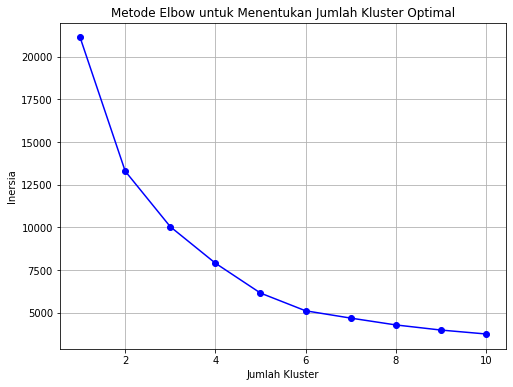

In [26]:
# Hitung inersia (within-cluster sum of squares) untuk berbagai jumlah kluster
inertia = []
k_values = range(1, 11)  # Coba dari 1 hingga 10 kluster
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow method untuk menentukan jumlah kluster yang optimal
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.grid()
plt.show()

In [34]:
import plotly.express as px
# from sklearn.manifold import TSNE
from sklearn.manifold import TSNE

def visualize_clusters(data, cluster_labels, cluster_type="Value-based"):
    """
    Visualize clusters using t-SNE and Plotly.

    Parameters:
    - data: DataFrame containing the features.
    - cluster_labels: Cluster labels for each data point.
    - cluster_type: Either "Value-based" or "Needs-based" for choosing features.
    """

    # Features based on cluster_type
    if cluster_type == "Value-based":
        features = ["Tenure Months", "Monthly Purchase (Thou. IDR)", "CLTV (Predicted Thou. IDR)"]
    elif cluster_type == "Needs-based":
        features = ["Games Product", "Music Product", "Education Product", "Video Product", "Call Center", "Use MyApp"]

    # Apply t-SNE to reduce data to 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    reduced_data = tsne.fit_transform(data[features])

    # Create a new DataFrame with reduced data and cluster labels
    df_reduced = pd.DataFrame(data=reduced_data, columns=["Dim1", "Dim2"])
    df_reduced["Cluster"] = cluster_labels

    # Create a scatter plot using Plotly
    fig = px.scatter(df_reduced, x="Dim1", y="Dim2", color="Cluster", title=f"{cluster_type} Clustering")
    fig.show()

# Example usage for Value-based clustering
visualize_clusters(df, df["Cluster"], cluster_type="Value-based")

# Example usage for Needs-based clustering
# visualize_clusters(df, df["Cluster"], cluster_type="Needs-based")

In [49]:
# Impor pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Pilih atribut yang akan digunakan untuk klasterisasi (misalnya, Monthly Purchase dan CLTV)
X = df[["Tenure Months", "Monthly Purchase (Thou. IDR)", "CLTV (Predicted Thou. IDR)"]]

# Preprocessing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Range nilai yang akan diuji untuk eps dan min_samples
eps_range = np.arange(0.1, 1.0, 0.05)
min_samples_range = range(5, 500, 50)

best_eps = 0
best_min_samples = 0
best_silhouette_score = -1

# Iterasi untuk mencari parameter terbaik
for eps in tqdm(eps_range):
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        if len(pd.Series(labels).unique()) > 1:
            silhouette_avg = silhouette_score(X_scaled, labels)
        
            if silhouette_avg > best_silhouette_score:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette_score = silhouette_avg

print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

# Sekarang Anda dapat menggunakan best_eps dan best_min_samples untuk melakukan klasterisasi dengan parameter terbaik
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(X_scaled)

100%|██████████| 18/18 [01:16<00:00,  4.27s/it]

Best eps: 0.7500000000000002
Best min_samples: 405


In [50]:
visualize_clusters(df, labels, cluster_type="Value-based")

In [54]:
pd.Series(labels).value_counts()

 0    3902
 1    1906
-1    1235
dtype: int64